In [10]:
import os

import yaml
from PIL import Image
import torch

from modules import *
from visprog import ProgramRunner

In [4]:
bgblur = BGBlur()
colorpop = ColorPop()
count = Count()
crop = Crop()
crop_left = CropLeft()
crop_right = CropRight()
crop_above = CropAbove()
crop_below = CropBelow()
emoji = Emoji()
eval_ = Eval()
facedet = FaceDet(device='cpu')
loc = Loc(device='cpu', threshold=0.08)
replace = Replace(device='cuda:0' if torch.cuda.is_available() else 'cpu')
result_ = Result()
seg = Seg(device='cpu')
select = Select(seg.model.config.id2label, seg.model.config.label2id, device='cpu')
vqa = VQA(device='cpu')

/Users/ahmad/opt/anaconda3/envs/visprog/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ahmad/opt/anaconda3/envs/visprog/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
safety_checker/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
/Users/ahmad/opt/anaconda3/envs/visprog/lib/python3.12/site-packages/transformers/models/maskformer/image_processing_maskformer.py:411: FutureWarning: The `size_divisibility` argument is deprecated and will be removed in v4.27. Please use `size_divisor` instead.
  warnings.warn(
/Users/ahmad/opt/anaconda3/envs/visprog/lib/python3.12/site-packages/transformers/models/maskformer/image_processing_maskformer.py:418: FutureWarning: The `max_size` argument is deprecated and will be removed in v4.27. Please use size['longest_edge'] instead.
  warnings.warn(


In [5]:
modules = [bgblur, colorpop, count, crop, crop_left, crop_right, crop_above, crop_below, emoji, eval_, facedet, loc, replace, result_, seg, select, vqa]

In [25]:
program_runner = ProgramRunner(modules)

In [3]:
def do_imgedit(image: Image, program: str):
  initial_state = {
    'IMAGE': image,
  }
  steps, result = program_runner.execute_program(program, initial_state)
  return steps, result

In [8]:
with open('assets/fig7/prompts.yaml', 'r') as f:
  prompts = yaml.safe_load(f)

In [11]:
images_dir = 'assets/fig7'

In [12]:
prompt = prompts[0]
instruction = prompt['prompt']['instruction']
image = Image.open(os.path.join(images_dir, prompt['image'])).convert('RGB')
instruction

'Replace Leonardo DiCaprio with Leonardo DiCaprio wearing sunglasses'

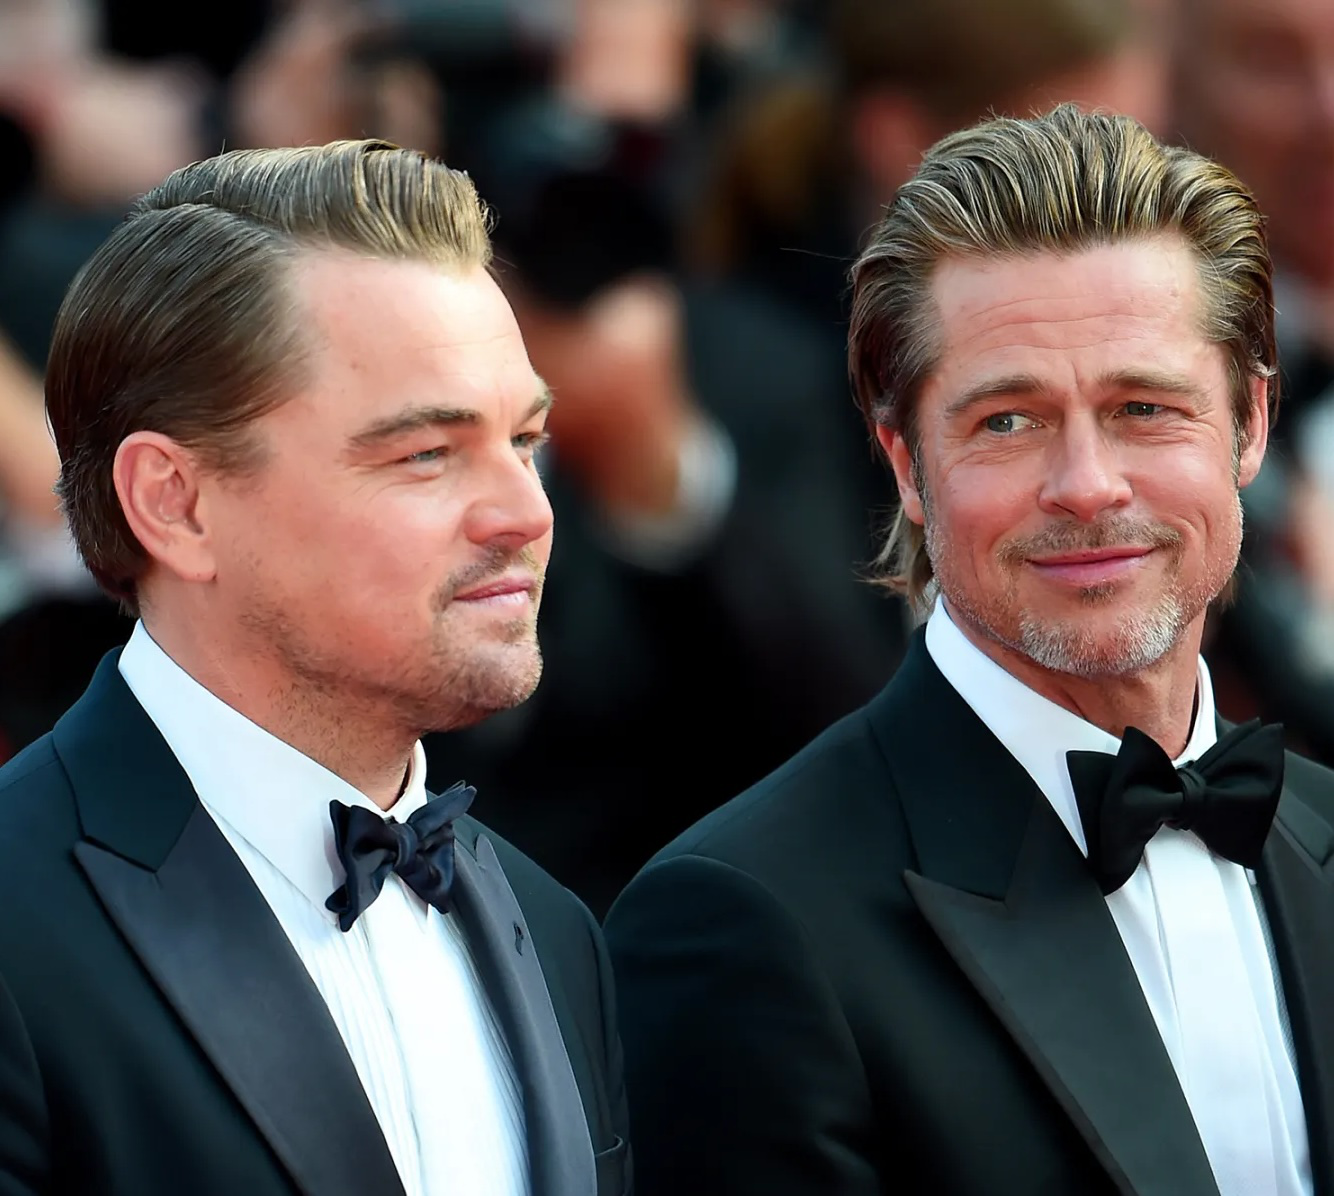

In [13]:
image

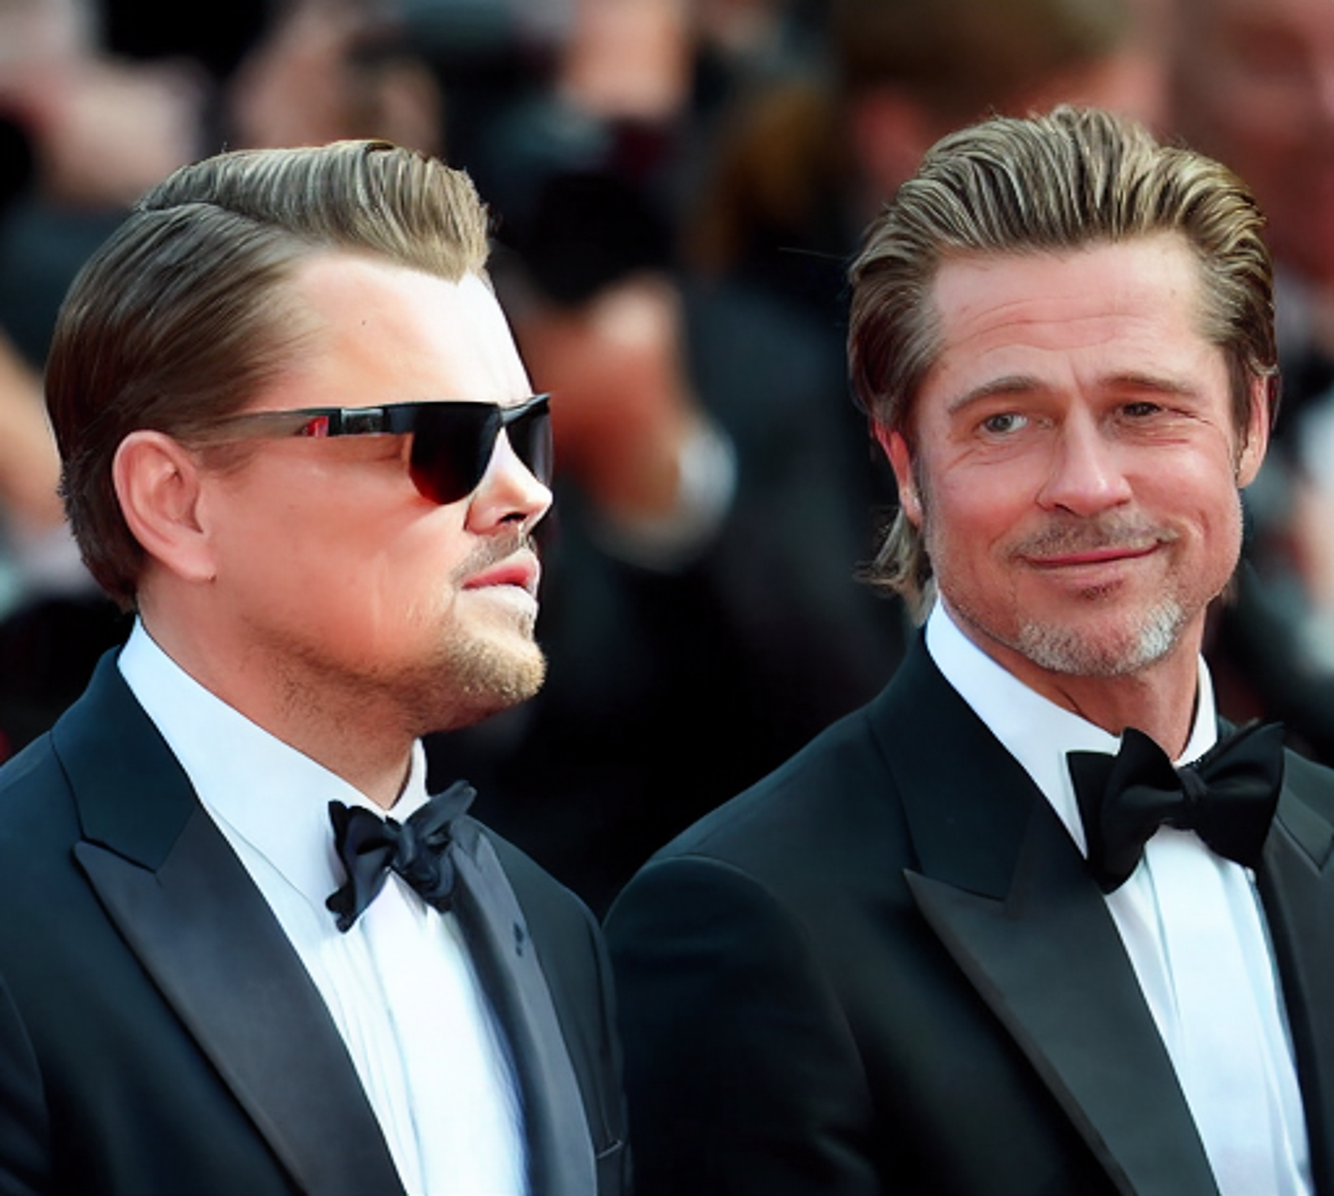

In [18]:
steps, result = do_imgedit(image, prompt['programs'][0])